In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate, arange

# 1 write function laing_chow

In [97]:
def laing_chow(x0,t,I1,I2):
    alpha = 0.2
    beta = 0.4
    sigma = 0.4
    tau = 20
    g1 = 1.
    g2 = 1.

    u1 = x0[0]
    a1 = x0[1]
    u2 = x0[2]
    a2 = x0[3]
    
    dy =    [-u1 + np.heaviside(alpha*u1*g1 - beta*u2*g2 - a1 + I1,1),
            (-a1 + sigma*np.heaviside(alpha*u1*g1 - beta*u2*g2 - a1 + I1,1))/tau,    
            -u2 + np.heaviside(alpha*u2*g2 - beta*u1*g1 - a2 + I2,1),
            (-a2 + sigma*np.heaviside(alpha*u2*g2 - beta*u1*g1 - a2 + I2,1))/tau]
    
    return dy

In [50]:
#  x0 contains: u1 = 1, a1 = 0.1 u2 = 0, a2 = 0.25
x0 = np.array([1., 0.1, 0., 0.25])
#t = np.linspace(0,500)
t = np.arange(0,500,0.01)

I1 = 0.43
I2 = 0.5

sol = integrate.odeint(laing_chow, x0, t, args=(I1,I2))

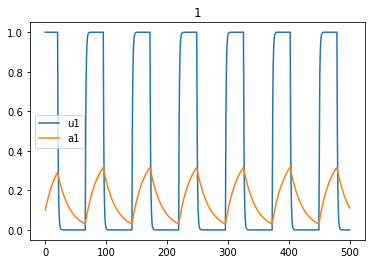

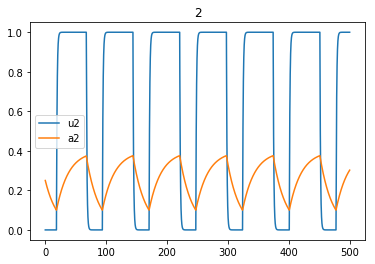

In [51]:
plt.plot(t,sol[:,0],label ='u1')
plt.plot(t,sol[:,1],label ='a1')
plt.legend()
plt.title('1')
plt.show()

plt.figure()
plt.plot(t,sol[:,2],label ='u2')
plt.plot(t,sol[:,3],label ='a2')
plt.legend()
plt.title('2')
plt.show()

# 2 determine dominance

In [52]:
def dominance_durations(x1,x2,t):
    buf = np.zeros(t.shape)
    buf = x1 > x2
    durations = []
    
    start = t[0]
    end = t[0]
    for i in range(1,t.shape[0]): 
        if buf[i] == buf[i-1]:    #that means we have dominance continuing
            end = t[i]
        
        else:
            end = t[i]
            #print(end)
            durations.append(end-start)
            start = t[i]
            

    return durations

In [53]:
dom = dominance_durations(sol[:,0],sol[:,2],t)

In [54]:
alpha = 0.2
beta = 0.4
sigma = 0.4
tau = 20
g1 = 1.
g2 = 1.

T1 = -tau*np.log((I2-beta)/(beta+sigma-I1))
T2 = -tau*np.log((I1-beta)/(beta+sigma-I2))

print('T1 analytical solution: ',T1)
print('T2 analytical solution: ',T2)
print('Average model solution for T1 ', np.mean(dom[::2]))
print('Average model solution for T2 ', np.mean(dom[1::2]))

T1 analytical solution:  26.16665639300358
T2 analytical solution:  46.051701859880936
Average model solution for T1  26.925714285714292
Average model solution for T2  48.46833333333333


Why are the dominance durations different from the analytical T 1 (eq. 9) in the paper?
- differential equations (5) & (6), the depression variables, are not included in our laing_chow function

# 3

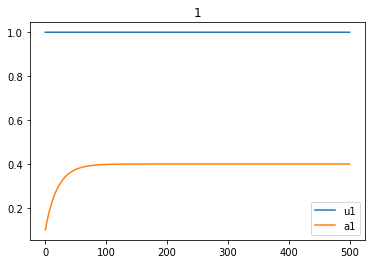

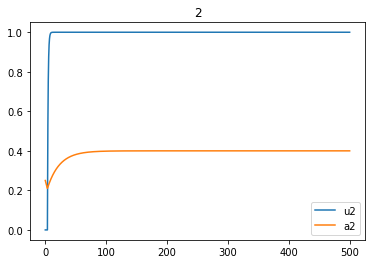

In [76]:
#simulation: I1 = 0.43, I2 = 0.5
b = -alpha+beta+sigma
I1new = b+0.021
I2new = b+0.01

solNew = integrate.odeint(laing_chow, x0, t, args=(I1new,I2new))

plt.plot(t,solNew[:,0],label ='u1')
plt.plot(t,solNew[:,1],label ='a1')
plt.legend()
plt.title('1')
plt.show()

plt.figure()
plt.plot(t,solNew[:,2],label ='u2')
plt.plot(t,solNew[:,3],label ='a2')
plt.legend()
plt.title('2')
plt.show()

In [72]:
print('mentioned threshold value: ', b)

mentioned threshold value:  0.6000000000000001


testing values for I1/I2 higher than the threshold value shows that both populations are active and oscillation stops. this doesnt fit to the experiments and neuronal activity as in that case binocular rivalry would not be there any more, but this is the thing we try to model.
For values in between threshold and initial I1/I2 value the populations are oscillating, but not agaist each other. this result is not fitting to the experimental results because when the two poputations oscillate, but this oscillations are not fitting together (one is acitve, the other one inactive), there is not the binacular rivalry, we want to model. The analytical solutions for dominance periods T are not fitting any more. the inputs have an area in which they can be adjusted so that the model works. 

In general comparision to the experimental results the chaotic dynamics of the spiking network ar not represented in the reduced model. 

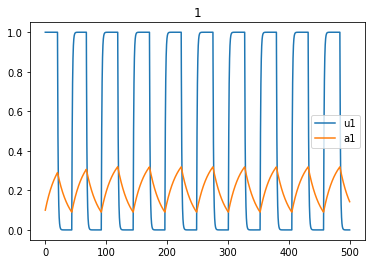

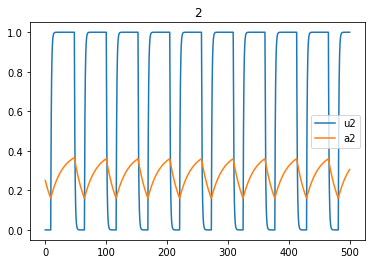

T1 analytical solution:  13.2279696449073
T2 analytical solution:  19.61658506023453
Average model solution for T1  26.925714285714292
Average model solution for T2  48.46833333333333


In [96]:
#simulation: I1 = 0.43, I2 = 0.5
b = -alpha+beta+sigma
I1new = I1 + 0.06
I2new = I2 + 0.06

solNew2 = integrate.odeint(laing_chow, x0, t, args=(I1new,I2new))

plt.plot(t,solNew2[:,0],label ='u1')
plt.plot(t,solNew2[:,1],label ='a1')
plt.legend()
plt.title('1')
plt.show()

plt.figure()
plt.plot(t,solNew2[:,2],label ='u2')
plt.plot(t,solNew2[:,3],label ='a2')
plt.legend()
plt.title('2')
plt.show()

dom2 = dominance_durations(solNew2[:,0],solNew2[:,2],t)
alpha = 0.2
beta = 0.4
sigma = 0.4
tau = 20
g1 = 1.
g2 = 1.

T1 = -tau*np.log((I2new-beta)/(beta+sigma-I1new))
T2 = -tau*np.log((I1new-beta)/(beta+sigma-I2new))

print('T1 analytical solution: ',T1)
print('T2 analytical solution: ',T2)
print('Average model solution for T1 ', np.mean(dom[::2]))
print('Average model solution for T2 ', np.mean(dom[1::2]))